In [84]:
#Import các thư viện cần thiết
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [85]:
df=pd.read_csv("EPL2223.csv")

In [86]:
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,8,11/6/2022,12:00,Premier League,Matchweek 15,Sun,Away,W,1,0,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,16,10/30/2022,14:00,Premier League,Matchweek 14,Sun,Home,W,5,0,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,14,10/23/2022,14:00,Premier League,Matchweek 13,Sun,Away,D,1,1,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,12,10/16/2022,14:00,Premier League,Matchweek 11,Sun,Away,W,1,0,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10,10/9/2022,16:30,Premier League,Matchweek 10,Sun,Home,W,3,2,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,5,9/18/2021,12:30,Premier League,Matchweek 5,Sat,Home,L,0,2,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,4,9/11/2021,15:00,Premier League,Matchweek 4,Sat,Away,W,2,0,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,3,8/29/2021,16:30,Premier League,Matchweek 3,Sun,Home,L,0,1,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,1,8/22/2021,14:00,Premier League,Matchweek 2,Sun,Home,L,0,1,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [87]:
#tiền xử lí dữ liệu, xóa các cột không sử dụng
#xóa cột unamed
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Premier League,Matchweek 15,Sun,Away,W,1,0,Chelsea,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Premier League,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Premier League,Matchweek 13,Sun,Away,D,1,1,Southampton,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Premier League,Matchweek 11,Sun,Away,W,1,0,Leeds United,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Premier League,Matchweek 10,Sun,Home,W,3,2,Liverpool,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Premier League,Matchweek 5,Sat,Home,L,0,2,Brentford,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Premier League,Matchweek 4,Sat,Away,W,2,0,Watford,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Premier League,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Premier League,Matchweek 2,Sun,Home,L,0,1,Tottenham,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [88]:
#xóa cột comp
df=df.drop(['comp'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,2.1,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,2.3,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,1.0,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,0.5,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,2.7,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,0.7,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,2.1,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,2.5,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,1.7,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [89]:
#xóa cột xg
df=df.drop(['xg'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,xga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,0.3,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,0.4,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,0.7,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,1.8,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,1.1,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,2.5,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,0.3,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,0.7,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,1.7,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [90]:
#xóa cột xga
df=df.drop(['xga'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [91]:
#xóa cột referee
df=df.drop(['referee'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [92]:
#xóa cột captain
df=df.drop(['captain'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [93]:
#xóa cột attendance
df=df.drop(['attendance'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,...,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,...,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,...,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,...,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,...,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,...,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,...,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,...,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,...,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [94]:
#xóa cột formation
df=df.drop(['formation'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,Match Report,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,Match Report,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,Match Report,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,Match Report,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,Match Report,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,Match Report,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,Match Report,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,Match Report,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,Match Report,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [95]:
#xóa cột match report
df=df.drop(['match report'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,poss,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,55,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,69,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,59,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,53,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,43,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,62,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,55,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,44,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,58,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [96]:
#xóa cột poss
df=df.drop(['poss'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,NaN,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,NaN,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,NaN,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,NaN,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,NaN,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,NaN,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,NaN,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,NaN,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,NaN,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [97]:
#xóa cột note
df=df.drop(['notes'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,sh,sot,dist,fk,pk,pkatt,season,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,14,2,14.5,0,0,0,2022,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,24,9,16.0,1,0,0,2022,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,12,3,17.2,0,0,0,2022,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,9,4,16.6,1,0,0,2022,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,10,6,14.3,0,1,1,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,11,0,22.8,1,0,0,2021,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,14,5,16.4,1,0,0,2021,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,15,5,15.9,0,0,0,2021,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,25,6,20.3,0,0,0,2021,Wolverhampton Wanderers


In [98]:
#xóa cột season
df=df.drop(['season'], axis=1)
df

,date,time,round,day,venue,result,gf,ga,opponent,sh,sot,dist,fk,pk,pkatt,team
0,11/6/2022,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,14,2,14.5,0,0,0,Arsenal
1,10/30/2022,14:00,Matchweek 14,Sun,Home,W,5,0,Nott'ham Forest,24,9,16.0,1,0,0,Arsenal
2,10/23/2022,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,12,3,17.2,0,0,0,Arsenal
3,10/16/2022,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,9,4,16.6,1,0,0,Arsenal
4,10/9/2022,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,10,6,14.3,0,1,1,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,9/18/2021,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,11,0,22.8,1,0,0,Wolverhampton Wanderers
1026,9/11/2021,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,14,5,16.4,1,0,0,Wolverhampton Wanderers
1027,8/29/2021,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester Utd,15,5,15.9,0,0,0,Wolverhampton Wanderers
1028,8/22/2021,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham,25,6,20.3,0,0,0,Wolverhampton Wanderers


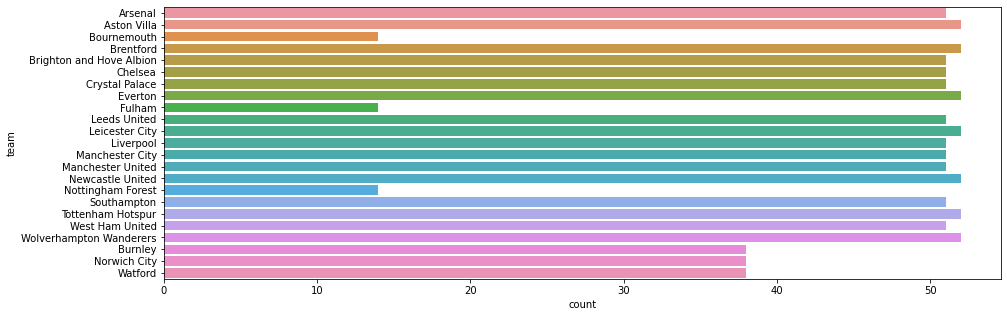

In [99]:
#xem thuộc tính team
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'team',data =df)
plt.show()

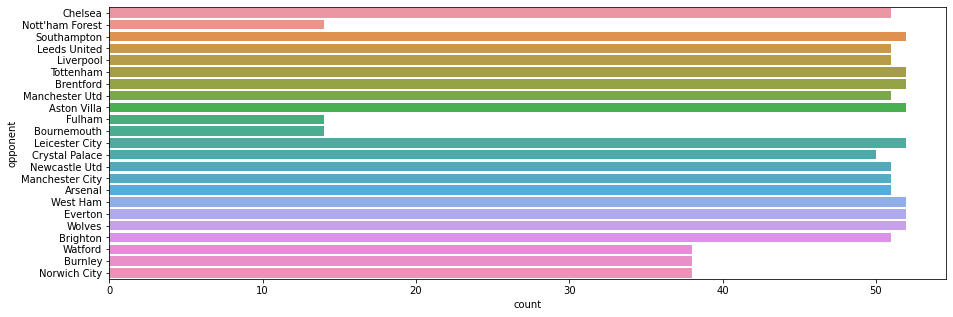

In [100]:
#xem thuộc tính opponent
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'opponent',data =df)
plt.show()

In [101]:
#ta thấy tên một số đội trong cột opponent khác cột team, nên đưa về 1 dạng đồng nhất


In [102]:
#Format lại tên cho Nottingham Forest
df=df.replace("Nott'ham Forest", "Nottingham Forest")

In [103]:
#Format lại tên cho Manchester United
df=df.replace("Manchester Utd", "Manchester United")

In [104]:
#Format lại tên cho Newcastle United
df=df.replace("Newcastle Utd", "Newcastle United")

In [105]:
#Format lại tên cho West Ham United
df=df.replace("West Ham", "West Ham United")

In [106]:
#Format lại tên cho Tottenham
df=df.replace("Tottenham", "Tottenham Hotspur")

In [107]:
#Format lại tên cho Brighton
df=df.replace("Brighton and Hove Albion", "Brighton")

In [108]:
#Format lại tên cho Newcastle Utd
df=df.replace("Newcastle Utd", "Newcastle United")

In [109]:
#Format lại tên cho Wolves
df=df.replace("Wolverhampton Wanderers", "Wolves")

In [110]:
#Chuyển đổi dữ liệu về dạng numeric

In [111]:
#Chuyển cột date thành data date
df["date"]=pd.to_datetime(df["date"])

In [112]:
#chuyển venue về dạng numeric
df['venue_code']=df["venue"].astype("category").cat.codes

In [113]:
#chuyển hour về dạng numeric
df['hour']=df["time"].str.replace(":.+","", regex=True).astype("int")

In [114]:
#chuyển đổi ngày trong tuần về dạng numeric
df["day_code"]=df["date"].dt.dayofweek

In [115]:
#chuyển cột result về dạng numeric
df["target"]=(df["result"]=="W").astype("int")

In [116]:
#tạo id cho từng đối thủ
df['opp_code']=df["opponent"].astype("category").cat.codes

In [117]:
df

,date,time,round,day,venue,result,gf,ga,opponent,sh,...,dist,fk,pk,pkatt,team,venue_code,hour,day_code,target,opp_code
0,2022-11-06,12:00,Matchweek 15,Sun,Away,W,1,0,Chelsea,14,...,14.5,0,0,0,Arsenal,0,12,6,1,6
1,2022-10-30,14:00,Matchweek 14,Sun,Home,W,5,0,Nottingham Forest,24,...,16.0,1,0,0,Arsenal,1,14,6,1,17
2,2022-10-23,14:00,Matchweek 13,Sun,Away,D,1,1,Southampton,12,...,17.2,0,0,0,Arsenal,0,14,6,0,18
3,2022-10-16,14:00,Matchweek 11,Sun,Away,W,1,0,Leeds United,9,...,16.6,1,0,0,Arsenal,0,14,6,1,10
4,2022-10-09,16:30,Matchweek 10,Sun,Home,W,3,2,Liverpool,10,...,14.3,0,1,1,Arsenal,1,16,6,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,2021-09-18,12:30,Matchweek 5,Sat,Home,L,0,2,Brentford,11,...,22.8,1,0,0,Wolves,1,12,5,0,3
1026,2021-09-11,15:00,Matchweek 4,Sat,Away,W,2,0,Watford,14,...,16.4,1,0,0,Wolves,0,15,5,1,20
1027,2021-08-29,16:30,Matchweek 3,Sun,Home,L,0,1,Manchester United,15,...,15.9,0,0,0,Wolves,1,16,6,0,14
1028,2021-08-22,14:00,Matchweek 2,Sun,Home,L,0,1,Tottenham Hotspur,25,...,20.3,0,0,0,Wolves,1,14,6,0,19


<AxesSubplot:xlabel='sot', ylabel='team'>

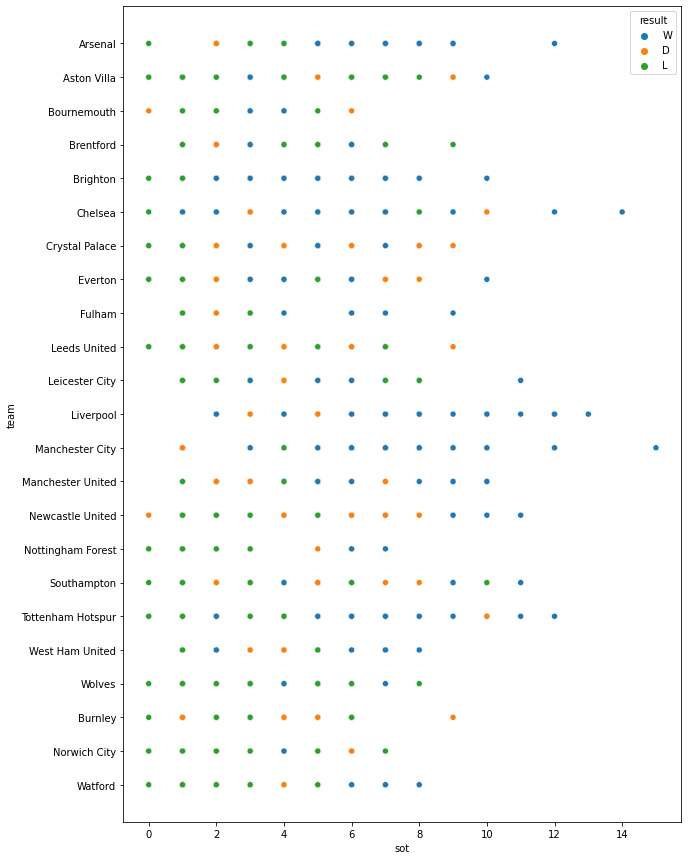

In [118]:
plt.rcParams['figure.figsize'] = [10, 15]
sns.scatterplot(data=df, x='sot', y='team', hue='result')

In [119]:
#tính rolling mean cho các giá trị predictor
def rolling_mean(group, cols, new_cols):
    group=group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols]=rolling_stats
    group=group.dropna(subset=new_cols)
    return group

In [120]:
cols =["gf","ga","sh", "sot", "dist", "fk","pk","pkatt"]
new_cols=[f"{c}_rolling" for c in cols]

In [121]:
df=rolling_mean(df, cols, new_cols)
df

,date,time,round,day,venue,result,gf,ga,opponent,sh,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
953,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,13,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
687,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,19,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
573,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,14,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
421,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,14,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
877,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,6,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,13,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
81,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,15,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
175,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,8,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
13,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,6,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [122]:
df.to_csv("preprocessed.csv")

<h3> Dùng giải thuật random forest

In [123]:
df=pd.read_csv("preprocessed.csv")

In [124]:
df

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,953,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,687,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,573,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,421,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,877,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,149,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,81,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,175,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,13,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [125]:
#xóa cột unamed
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,date,time,round,day,venue,result,gf,ga,opponent,sh,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,13,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,19,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,14,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,14,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,6,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,13,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,15,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,8,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,6,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [126]:
df.index=range(df.shape[0])

In [127]:
#import library đo thời gian
from datetime import datetime, timedelta
import time

In [128]:
rf=RandomForestClassifier(n_estimators=50, min_samples_split=10,random_state=1)

In [129]:
predictors=['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [130]:
#train model và chạy thuật toán
train= df[df["date"]<'2022-08-01'] #chia trainset là các trận đấu trước ngày 1/8/2022
test= df[df["date"]>'2022-08-01'] #chia testset là các trận đấu sau ngày 1/8/2022
start_RF=time.time() #đặt mốc đo thời gian thuật toán
rf.fit(train[predictors],train["target"])
preds=rf.predict(test[predictors])
end_RF=time.time()
combined =pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)
timeRF=timedelta(seconds=round(end_RF-start_RF,4))
precision= precision_score(test["target"], preds) #tính độ chính xác của thuật toán
print(timeRF)

0:00:00.091000


In [131]:
precision

0.5675675675675675

In [132]:
timeRF

datetime.timedelta(microseconds=91000)

In [133]:
combined.to_csv("combined.csv")

In [134]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,152,16
1,81,21


In [135]:
combined =combined.merge(df[["date", "team","opponent","result"]], left_index=True, right_index=True)

In [136]:
combined

,actual,prediction,date,team,opponent,result
757,1,0,2022-08-05,Arsenal,Crystal Palace,W
758,0,0,2022-08-05,Crystal Palace,Arsenal,L
759,1,0,2022-08-06,Leeds United,Wolves,W
760,0,0,2022-08-06,Southampton,Tottenham Hotspur,L
761,1,1,2022-08-06,Newcastle United,Nottingham Forest,W
...,...,...,...,...,...,...
1022,1,0,2022-11-06,Liverpool,Tottenham Hotspur,W
1023,1,0,2022-11-06,Crystal Palace,West Ham United,W
1024,0,0,2022-11-06,Manchester United,Aston Villa,L
1025,1,0,2022-11-06,Aston Villa,Manchester United,W


In [137]:
merged = combined.merge(combined, left_on=["date", "team"], right_on=["date","opponent"])

In [138]:
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,actual_y,prediction_y,team_y,opponent_y,result_y
0,1,0,2022-08-05,Arsenal,Crystal Palace,W,0,0,Crystal Palace,Arsenal,L
1,0,0,2022-08-05,Crystal Palace,Arsenal,L,1,0,Arsenal,Crystal Palace,W
2,1,0,2022-08-06,Leeds United,Wolves,W,0,0,Wolves,Leeds United,L
3,0,0,2022-08-06,Southampton,Tottenham Hotspur,L,1,0,Tottenham Hotspur,Southampton,W
4,1,1,2022-08-06,Newcastle United,Nottingham Forest,W,0,0,Nottingham Forest,Newcastle United,L
...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,2022-11-06,Chelsea,Arsenal,L,1,0,Arsenal,Chelsea,W
264,1,0,2022-11-06,Liverpool,Tottenham Hotspur,W,0,0,Tottenham Hotspur,Liverpool,L
265,0,0,2022-11-06,Manchester United,Aston Villa,L,1,0,Aston Villa,Manchester United,W
266,1,0,2022-11-06,Aston Villa,Manchester United,W,0,0,Manchester United,Aston Villa,L


In [139]:
merged[(merged["prediction_x"]==1) & (merged["prediction_y"]==0)]["actual_x"].value_counts()

1    18
0    13
Name: actual_x, dtype: int64

In [140]:
combined.head(10)

,actual,prediction,date,team,opponent,result
757,1,0,2022-08-05,Arsenal,Crystal Palace,W
758,0,0,2022-08-05,Crystal Palace,Arsenal,L
759,1,0,2022-08-06,Leeds United,Wolves,W
760,0,0,2022-08-06,Southampton,Tottenham Hotspur,L
761,1,1,2022-08-06,Newcastle United,Nottingham Forest,W
762,0,0,2022-08-06,Wolves,Leeds United,L
763,0,1,2022-08-06,Liverpool,Fulham,D
764,0,0,2022-08-06,Everton,Chelsea,L
765,0,0,2022-08-06,Fulham,Liverpool,D
766,1,0,2022-08-06,Bournemouth,Aston Villa,W


<h3> Giải thuật Naive Bayes

In [141]:
df2=pd.read_csv("preprocessed.csv")
df2

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,953,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,687,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,573,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,421,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,877,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,149,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,81,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,175,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,13,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [142]:
#xóa cột unamed
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2

,date,time,round,day,venue,result,gf,ga,opponent,sh,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,13,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,19,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,14,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,14,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,6,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,13,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,15,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,8,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,6,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [143]:
#đặt các input value (predictor)
predictors=['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [144]:
#train model và chạy thuật toán
train= df[df["date"]<'2022-08-01'] #chia trainset là các trận đấu trước ngày 1/8/2022
test= df[df["date"]>'2022-08-01'] #chia testset là các trận đấu sau ngày 1/8/2022
start_Bayes = time.time()
gnb = GaussianNB()
gnb.fit(train[predictors],train["target"])
bayes_pred = gnb.predict(test[predictors])
combined2 =pd.DataFrame(dict(actual=test["target"], prediction=bayes_pred), index=test.index)
end_Bayes= time.time()
timebayes = timedelta(seconds=round(end_Bayes-start_Bayes,4))
precisionBAYES= precision_score(test["target"], bayes_pred)
print(timebayes)

0:00:00.006000


In [145]:
pd.crosstab(index=combined2["actual"], columns=combined2["prediction"])

prediction,0,1
actual,,
0,151,17
1,76,26


<h3> Giải thuật Cart




In [146]:
df3=pd.read_csv("preprocessed.csv")
df3

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,953,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,687,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,573,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,421,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,877,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,149,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,81,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,175,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,13,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [147]:
#xóa cột unamed
df3.drop(df3.columns[df3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df3

,date,time,round,day,venue,result,gf,ga,opponent,sh,...,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,2,Aston Villa,13,...,1,1,0.666667,1.000000,15.666667,3.333333,16.333333,0.333333,0.0,0.0
1,2021-08-14,17:30,Matchweek 1,Sat,Away,W,3,0,Norwich City,19,...,1,16,1.000000,1.666667,17.333333,4.666667,18.266667,0.333333,0.0,0.0
2,2021-08-14,15:00,Matchweek 1,Sat,Home,W,3,1,Southampton,14,...,1,18,2.000000,1.000000,16.333333,5.333333,17.700000,0.333333,0.0,0.0
3,2021-08-14,15:00,Matchweek 1,Sat,Away,W,2,1,Burnley,14,...,1,5,3.000000,1.000000,15.333333,6.333333,15.900000,0.666667,0.0,0.0
4,2021-08-14,15:00,Matchweek 1,Sat,Away,L,1,3,Everton,6,...,0,8,2.666667,0.666667,15.666667,6.000000,14.900000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,2022-11-06,16:30,Matchweek 15,Sun,Away,W,2,1,Tottenham Hotspur,13,...,1,19,1.666667,1.333333,8.666667,3.333333,15.266667,0.000000,0.0,0.0
1023,2022-11-06,14:00,Matchweek 15,Sun,Away,W,2,1,West Ham United,15,...,1,21,2.000000,1.000000,8.333333,3.666667,17.533333,0.000000,0.0,0.0
1024,2022-11-06,14:00,Matchweek 15,Sun,Away,L,1,3,Aston Villa,8,...,0,1,1.333333,1.000000,11.000000,4.333333,19.233333,0.666667,0.0,0.0
1025,2022-11-06,14:00,Matchweek 15,Sun,Home,W,3,1,Manchester United,6,...,1,14,1.666667,1.666667,12.000000,5.000000,20.466667,1.000000,0.0,0.0


In [148]:
start_CART = time.time()
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(train[predictors],train["target"])
cart_pred = clf2.predict(test[predictors])
end_CART= time.time()
timeCART = timedelta(seconds=round(end_CART-start_CART,4))
precisionCART= precision_score(test["target"], cart_pred)
print(timeCART)

0:00:00.008000


In [149]:
precisionCART

0.3963963963963964

<h3>KNN

In [150]:
#importing Classifier
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(n_neighbors=3)

In [152]:
knn.fit(train[predictors],train["target"])

KNeighborsClassifier(n_neighbors=3)

In [153]:
start_KNN = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train[predictors],train["target"])
knn_pred = knn.predict(test[predictors])
combinedknn =pd.DataFrame(dict(actual=test["target"], prediction=knn_pred), index=test.index)
end_KNN= time.time()
timeKNN = timedelta(seconds=round(end_KNN-start_KNN,4))
precisionknn= precision_score(test["target"], knn_pred)
print(timeKNN)

0:00:00.015000


In [154]:
combinedknn =combinedknn.merge(df[["date", "team","opponent","result"]], left_index=True, right_index=True)
combinedknn

,actual,prediction,date,team,opponent,result
757,1,0,2022-08-05,Arsenal,Crystal Palace,W
758,0,1,2022-08-05,Crystal Palace,Arsenal,L
759,1,0,2022-08-06,Leeds United,Wolves,W
760,0,0,2022-08-06,Southampton,Tottenham Hotspur,L
761,1,0,2022-08-06,Newcastle United,Nottingham Forest,W
...,...,...,...,...,...,...
1022,1,1,2022-11-06,Liverpool,Tottenham Hotspur,W
1023,1,1,2022-11-06,Crystal Palace,West Ham United,W
1024,0,0,2022-11-06,Manchester United,Aston Villa,L
1025,1,1,2022-11-06,Aston Villa,Manchester United,W


In [155]:
#choose the best K value
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train[predictors],train["target"])
    predknn = knn.predict(test[predictors])
    error_rate.append(np.mean(predknn != test["target"]))

Text(0, 0.5, 'Error Rate')

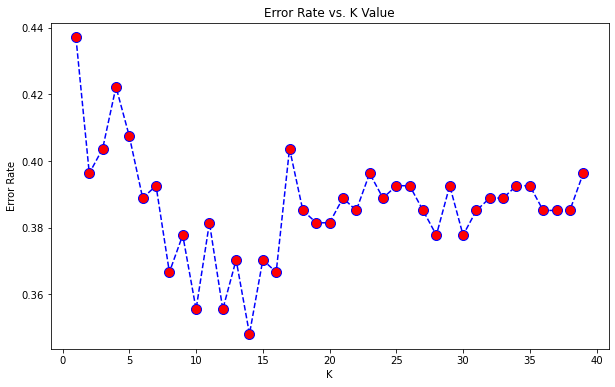

In [156]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [157]:
#Best K:14
#retrain
start_KNN = time.time()
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(train[predictors],train["target"])
knn_pred = knn.predict(test[predictors])
combinedknn =pd.DataFrame(dict(actual=test["target"], prediction=knn_pred), index=test.index)
end_KNN= time.time()
timeKNN = timedelta(seconds=round(end_KNN-start_KNN,4))
precisionknn= precision_score(test["target"], knn_pred)
print(timeKNN)

0:00:00.017000


In [158]:
precisionknn

0.6111111111111112

<h3> Đánh giá các thuật toán và dùng để dự đoán

Text(0.5, 1.0, 'Thời gian chạy của 3 thuật toán')

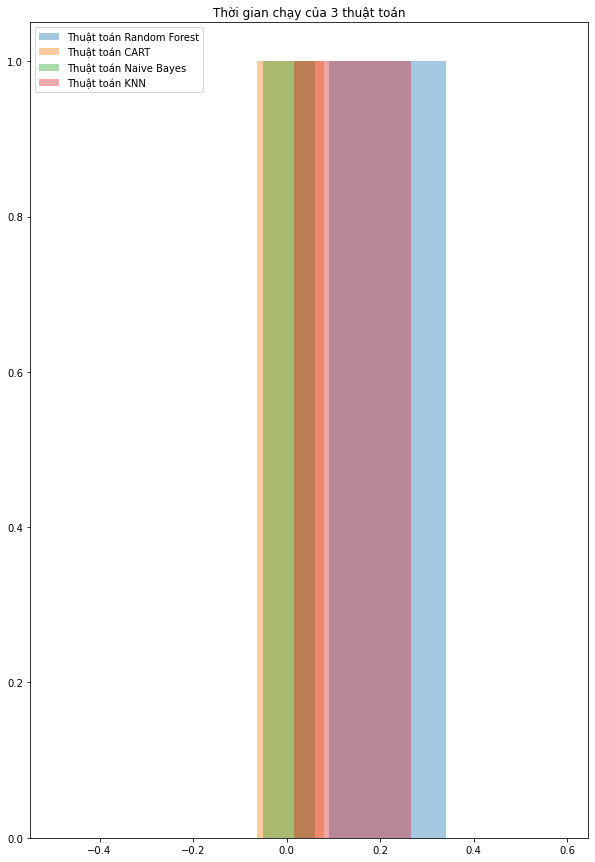

In [181]:
ax = sns.distplot((end_RF-start_RF), bins=4, label = 'Thuật toán Random Forest', kde = False)
ax = sns.distplot((end_CART-start_CART), bins=7, label = 'Thuật toán CART', kde = False)
ax = sns.distplot((end_Bayes-start_Bayes), bins=9, label = 'Thuật toán Naive Bayes', kde = False)
ax = sns.distplot((end_KNN-start_KNN), bins=4, label = 'Thuật toán KNN', kde = False)
ax.legend()
ax.set_title('Thời gian chạy của 3 thuật toán')

C:\Users\LLong\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Độ chính xác của 3 thuật toán')

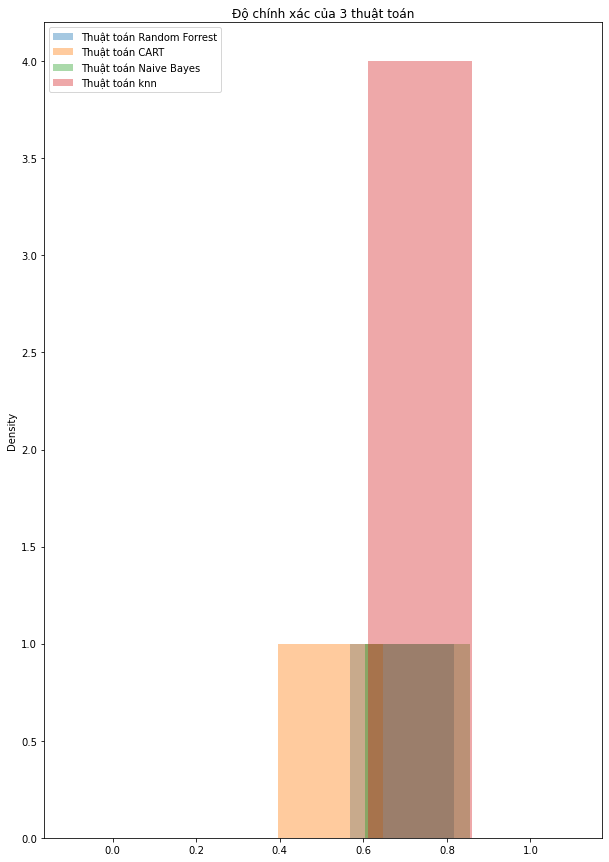

In [160]:
#Đo độ chính xác của 3 thuật toán
ax = sns.distplot(precision, bins=4, label = 'Thuật toán Random Forrest', kde = False)
ax = sns.distplot(precisionCART, bins=4, label = 'Thuật toán CART', kde = False)
ax = sns.distplot(precisionBAYES, bins=4, label = 'Thuật toán Naive Bayes', kde = False)
ax = sns.distplot(precisionknn,bins=4, label="Thuật toán knn")
ax.legend()
ax.set_title('Độ chính xác của 3 thuật toán')

<h3> Dự đoán kết quả ở vòng đấu tiếp theo

In [161]:
predict = pd.read_csv('predictEPL.csv')
predict

,date,opponent,season,team,venue_code,hour,day_code,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,13/10/2022,Brentford,2022,Manchester City,1,12,7,NaN,3,2.000000,0.666667,13.000000,4.000000,17.966667,0.666667,0.666667,0.666667
1,13/10/2022,Leeds United,2022,Tottenham,1,15,7,NaN,10,1.666667,2.000000,18.000000,5.333333,15.466667,0.333333,0.000000,0.000000
2,13/10/2022,Southamton,2022,Liverpool,1,15,7,NaN,18,1.000000,1.333333,16.666667,7.666667,16.000000,0.000000,0.000000,0.000000
3,13/10/2022,Everton,2022,Bournemouth,1,15,7,NaN,8,1.666667,3.000000,6.666667,4.000000,13.333333,0.000000,0.000000,0.000000
4,13/10/2022,Leicester City,2022,West Ham,1,15,7,NaN,11,0.666667,0.666667,13.000000,3.000000,19.533333,0.333333,0.333333,0.666667
5,13/10/2022,Crystal Palace,2022,Nottingham Forest,1,15,7,NaN,7,1.000000,2.333333,10.000000,5.000000,18.033333,0.000000,0.000000,0.000000
6,13/10/2022,Chelsea,2022,Newcastle United,1,17,7,NaN,6,1.000000,2.333333,10.000000,5.000000,18.033333,0.000000,0.000000,0.000000
7,13/10/2022,Arsenal,2022,Wolves,1,19,7,NaN,0,0.000000,3.300000,13.666667,4.333333,18.133333,0.333333,0.333333,0.333333
8,13/10/2022,Aston Villa,2022,Brighton,1,14,7,NaN,1,2.666667,2.000000,15.333333,5.666667,17.633333,1.000000,0.000000,0.000000
9,13/10/2022,Manchester United,2022,Fulham,1,16,7,NaN,14,1.333333,1.333333,12.666667,3.666667,18.166667,0.000000,0.333333,0.333333


In [162]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20 non-null     object 
 1   opponent       20 non-null     object 
 2   season         20 non-null     int64  
 3   team           20 non-null     object 
 4   venue_code     20 non-null     int64  
 5   hour           20 non-null     int64  
 6   day_code       20 non-null     int64  
 7   target         0 non-null      float64
 8   opp_code       20 non-null     int64  
 9   gf_rolling     20 non-null     float64
 10  ga_rolling     20 non-null     float64
 11  sh_rolling     20 non-null     float64
 12  sot_rolling    20 non-null     float64
 13  dist_rolling   20 non-null     float64
 14  fk_rolling     20 non-null     float64
 15  pk_rolling     20 non-null     float64
 16  pkatt_rolling  20 non-null     float64
dtypes: float64(9), int64(5), object(3)
memory usage: 2.8+ KB

In [163]:
predict

,date,opponent,season,team,venue_code,hour,day_code,target,opp_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,13/10/2022,Brentford,2022,Manchester City,1,12,7,NaN,3,2.000000,0.666667,13.000000,4.000000,17.966667,0.666667,0.666667,0.666667
1,13/10/2022,Leeds United,2022,Tottenham,1,15,7,NaN,10,1.666667,2.000000,18.000000,5.333333,15.466667,0.333333,0.000000,0.000000
2,13/10/2022,Southamton,2022,Liverpool,1,15,7,NaN,18,1.000000,1.333333,16.666667,7.666667,16.000000,0.000000,0.000000,0.000000
3,13/10/2022,Everton,2022,Bournemouth,1,15,7,NaN,8,1.666667,3.000000,6.666667,4.000000,13.333333,0.000000,0.000000,0.000000
4,13/10/2022,Leicester City,2022,West Ham,1,15,7,NaN,11,0.666667,0.666667,13.000000,3.000000,19.533333,0.333333,0.333333,0.666667
5,13/10/2022,Crystal Palace,2022,Nottingham Forest,1,15,7,NaN,7,1.000000,2.333333,10.000000,5.000000,18.033333,0.000000,0.000000,0.000000
6,13/10/2022,Chelsea,2022,Newcastle United,1,17,7,NaN,6,1.000000,2.333333,10.000000,5.000000,18.033333,0.000000,0.000000,0.000000
7,13/10/2022,Arsenal,2022,Wolves,1,19,7,NaN,0,0.000000,3.300000,13.666667,4.333333,18.133333,0.333333,0.333333,0.333333
8,13/10/2022,Aston Villa,2022,Brighton,1,14,7,NaN,1,2.666667,2.000000,15.333333,5.666667,17.633333,1.000000,0.000000,0.000000
9,13/10/2022,Manchester United,2022,Fulham,1,16,7,NaN,14,1.333333,1.333333,12.666667,3.666667,18.166667,0.000000,0.333333,0.333333


In [164]:
train2= df[df["date"]<'2022-11-10'] #chia trainset là các trận đấu trước ngày 10/11/2022
test2= predict 
rf.fit(train2[predictors],train2["target"])
predictedresult=rf.predict(test2[predictors])

In [165]:
predictedresult

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [166]:
predictedresult = pd.DataFrame(predictedresult)

In [167]:
predictedresult

,0
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [168]:
predictedresult =predictedresult.merge(predict[["date", "team","opponent"]], left_index=True, right_index=True)

In [169]:
predictedresult

,0,date,team,opponent
0,1,13/10/2022,Manchester City,Brentford
1,1,13/10/2022,Tottenham,Leeds United
2,1,13/10/2022,Liverpool,Southamton
3,0,13/10/2022,Bournemouth,Everton
4,0,13/10/2022,West Ham,Leicester City
5,0,13/10/2022,Nottingham Forest,Crystal Palace
6,0,13/10/2022,Newcastle United,Chelsea
7,1,13/10/2022,Wolves,Arsenal
8,0,13/10/2022,Brighton,Aston Villa
9,0,13/10/2022,Fulham,Manchester United


In [170]:
train2= df[df["date"]<'2022-11-01'] #chia trainset là các trận đấu trước ngày 1/11/2022
test2= predict 
knn.fit(train2[predictors],train2["target"])
predictedresult=knn.predict(test2[predictors])

In [171]:
predictedresult

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [172]:
predictedresult = pd.DataFrame(predictedresult)

In [173]:
predictedresult =predictedresult.merge(predict[["date", "team","opponent"]], left_index=True, right_index=True)

In [174]:
predictedresult

,0,date,team,opponent
0,0,13/10/2022,Manchester City,Brentford
1,1,13/10/2022,Tottenham,Leeds United
2,1,13/10/2022,Liverpool,Southamton
3,0,13/10/2022,Bournemouth,Everton
4,0,13/10/2022,West Ham,Leicester City
5,0,13/10/2022,Nottingham Forest,Crystal Palace
6,0,13/10/2022,Newcastle United,Chelsea
7,0,13/10/2022,Wolves,Arsenal
8,0,13/10/2022,Brighton,Aston Villa
9,0,13/10/2022,Fulham,Manchester United
